<a href="https://colab.research.google.com/github/JinxWycman/Codveda-Machine-Learning-Internship-Level-1-Tasks/blob/main/House_Price_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4239888727.py:14: SyntaxWarning: invalid escape sequence '\s'
  df_house = pd.read_csv('/content/4) house Prediction Data Set.csv', header=None, sep='\s+', skipinitialspace=True)


R² score: 0.668759493535632
MSE: 24.291119474973513


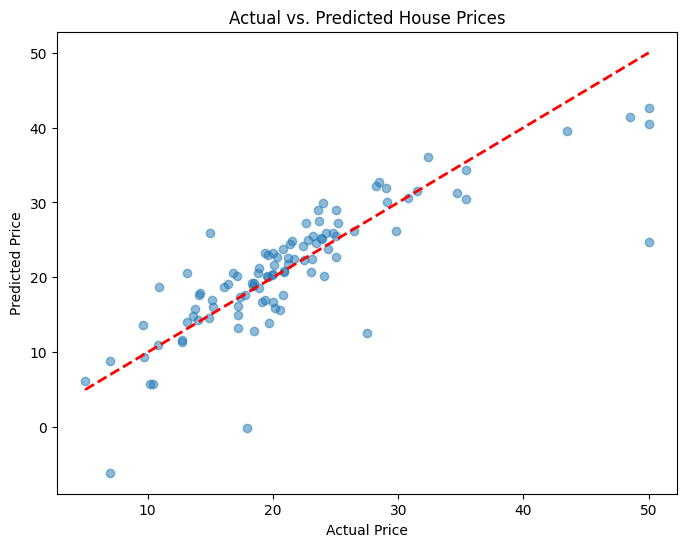

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


df_house = pd.read_csv('/content/4) house Prediction Data Set.csv', header=None, sep='\s+', skipinitialspace=True)
df_house.columns = column_names


num_cols = df_house.select_dtypes(include=['int64', 'float64']).columns
df_house[num_cols] = df_house[num_cols].fillna(df_house[num_cols].median())


for col in cat_cols:
    df_house[col] = df_house[col].fillna(df_house[col].mode()[0])


X = df_house.drop('MEDV', axis=1)
y = df_house['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
print('R² score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()